In [32]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import datetime as dt

pd.options.mode.chained_assignment = None  # default='warn' exclude warning for chained assingments

In [4]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) ## change float at the macro level

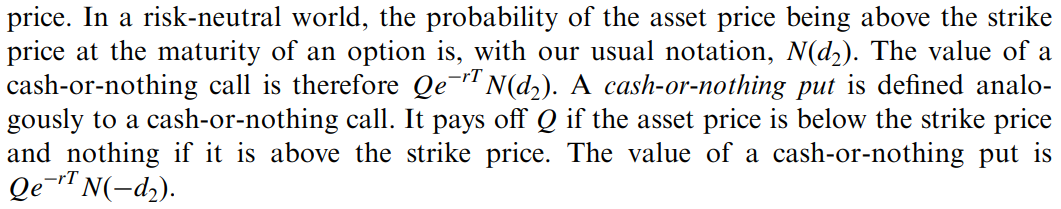

In [136]:
def BinaryCall (spot, strike, T, sigma, rf = 0, Q = 1):
    
    """""""""
    rf - risk free rate;
    spot - current spot price of the target asset;
    strike - option strike price;
    T - time, measured in years. For instance 1 month would be 1/12;
    sigma - expected annual volatility. For instance, 100% annual volatility would mean sigma in our model equals 1.
    
    binary_call = Q * exp(-rfT)*N(d2)
    binary_put = Q*exp(-rfT)*N(-d2)

    """""""""
    
    d1 = (np.log(spot/strike) + T * (rf + (sigma**2)/2)) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    neg_d1 = -d1
    neg_d2 = -d2
    
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    N_neg_d1 = norm.cdf(neg_d1)
    N_neg_d2 = norm.cdf(neg_d2)
    
    exp1 = np.exp(-rf*T)    
    
    call_price = Q * exp1 * N_d2
    put_price = Q * exp1 * N_neg_d2 
    
    data = pd.DataFrame(data = [call_price, put_price], columns = ['Price'], index = ['Call', 'Put'])

    return data

In [148]:
rf, spot, strike, T, sigma, Q = 0, 80, 100, 30/365, 2, 1

input_frame = pd.DataFrame(data = [rf, spot, strike, T, sigma, Q], columns=['Input'], 
                   index=['Risk-free rate', 'Spot', 'Strike', 'T', 'Volatility', 'Payoff'])
display(input_frame)

,Input
Risk-free rate,0.0000
Spot,80.0000
Strike,100.0000
T,0.0822
Volatility,2.0000
Payoff,1.0000


In [149]:
BinaryCall(spot, strike, T, sigma)

,Price
Call,0.2496
Put,0.7504


# EXAMPLE: Price ETH Binary Option

In [33]:
def get_data_for_the_past_x_days(coin_name, day_num, currency = 'usd', data_type = "prices"):
    """""""""
    get_data_for_the_past_x_days(coin_name='bitcoin', day_num=120)
    data_type could be market_caps or total volumes 
    day_num should be higher than 90 to get daily data
    """""""""
    data = cg.get_coin_market_chart_by_id(id = coin_name, vs_currency = currency, days = day_num)
    data = data[data_type]
    date = []
    price = []
    for i in range(len(data)):
        date.append(dt.datetime.fromtimestamp((data[i][0])/1000))
        price.append(data[i][1])
    
    df = pd.DataFrame(data = price, index = date, columns=[coin_name])
    
    return df

In [122]:
eth = get_data_for_the_past_x_days('ethereum', 5)

In [123]:
eth_returns = (np.log(eth)-np.log(eth.shift(1)))[1:]

## If hourly data

In [150]:
sigma = (np.std(eth_returns) * np.sqrt(24*365))[0]

In [163]:
sigma

0.7886967896277917

In [151]:
spot = eth[-1:]['ethereum'][0]

In [160]:
strike = 5000

In [161]:
input_frame = pd.DataFrame(data = [rf, spot, strike, T, sigma, Q], columns=['Input'], 
                   index=['Risk-free rate', 'Spot', 'Strike', 'T', 'Volatility', 'Payoff'])
display(input_frame)

,Input
Risk-free rate,0.0000
Spot,3723.6017
Strike,5000.0000
T,0.0822
Volatility,0.7887
Payoff,1.0000


In [162]:
BinaryCall(spot, strike, T, sigma)

,Price
Call,0.0783
Put,0.9217


In [112]:
# just a quick check on coingecko data

for i in range(len(eth)):
    print(eth.index[-i] - eth.index[-i-1])

-30 days +00:41:10.388000
0 days 00:17:58.899000
0 days 01:00:50.616000
0 days 00:59:10.626000
0 days 00:59:06.172000
0 days 00:59:59.270000
0 days 01:00:38.029000
0 days 01:00:07.852000
0 days 01:00:09.983000
0 days 01:00:53.180000
0 days 00:55:55.768000
0 days 01:02:50.624000
0 days 00:59:59.383000
0 days 01:00:56.163000
0 days 00:58:59.007000
0 days 01:01:54.401000
0 days 00:58:34.432000
0 days 01:00:37.205000
0 days 01:00:14.442000
0 days 00:57:44.897000
0 days 01:01:32.991000
0 days 00:59:14.359000
0 days 01:01:18.190000
0 days 01:00:00.819000
0 days 00:58:56.767000
0 days 00:58:50.397000
0 days 01:02:06.369000
0 days 00:57:47.994000
0 days 00:58:55.670000
0 days 01:02:06.601000
0 days 01:00:51.584000
0 days 00:58:00.411000
0 days 01:02:13.105000
0 days 00:59:29.379000
0 days 00:59:57.928000
0 days 01:01:49.138000
0 days 00:59:01.899000
0 days 00:59:32.033000
0 days 00:57:49.068000
0 days 01:02:10.605000
0 days 00:57:21.680000
0 days 01:02:48.951000
0 days 00:59:22.047000
0 days 0